In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [53]:
data=load_breast_cancer()

In [54]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [55]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [56]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [57]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [58]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [59]:
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [60]:
cancer_data=pd.DataFrame(data.data)

In [61]:
cancer_data

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [62]:
cancer_target=pd.DataFrame(data.target)

In [63]:
cancer_target

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [64]:
x=cancer_data
x

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [65]:
y=data.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [66]:
x.shape

(569, 30)

In [67]:
y.shape

(569,)

In [68]:
y=y.reshape(-1,1)

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=50)

In [70]:
train_x.shape

(443, 30)

In [71]:
test_x.shape

(126, 30)

In [72]:
train_y.shape

(443, 1)

In [73]:
test_y.shape

(126, 1)

## Practice Machine Learning

In [24]:
lg=LogisticRegression()

In [25]:
lg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
pred=lg.predict(test_x)
print(pred)

[1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1
 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1]


In [27]:
print('accuracy_score:',accuracy_score(pred,test_y))

accuracy_score: 0.9523809523809523


In [28]:
print(confusion_matrix(test_y,pred))

[[39  4]
 [ 2 81]]


In [29]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.98      0.96        83

    accuracy                           0.95       126
   macro avg       0.95      0.94      0.95       126
weighted avg       0.95      0.95      0.95       126



In [30]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.98      0.96        83

    accuracy                           0.95       126
   macro avg       0.95      0.94      0.95       126
weighted avg       0.95      0.95      0.95       126



# UCI Macine Learning

In [31]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


import seaborn as sb

In [32]:
ds=pd.read_csv('concrete_data.csv')

In [33]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [34]:
sb

<module 'seaborn' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

In [35]:
data=pd.DataFrame(data=ds)

In [36]:
data.shape

(1030, 9)

In [37]:
data.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [39]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [40]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


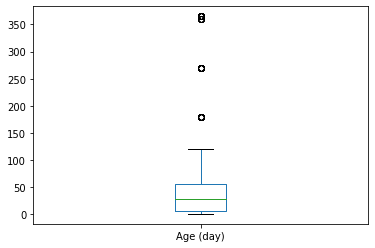

In [41]:
data['Age (day)'].plot.box()

In [42]:
#data.plot?

Cement (component 1)(kg in a m^3 mixture)                   AxesSubplot(0.125,0.536818;0.133621x0.343182)
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Fly Ash (component 3)(kg in a m^3 mixture)                AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Water  (component 4)(kg in a m^3 mixture)                AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Superplasticizer (component 5)(kg in a m^3 mixture)      AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Coarse Aggregate  (component 6)(kg in a m^3 mixture)           AxesSubplot(0.125,0.125;0.133621x0.343182)
Fine Aggregate (component 7)(kg in a m^3 mixture)           AxesSubplot(0.285345,0.125;0.133621x0.343182)
Age (day)                                                    AxesSubplot(0.44569,0.125;0.133621x0.343182)
Concrete compressive strength(MPa, megapascals)             AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

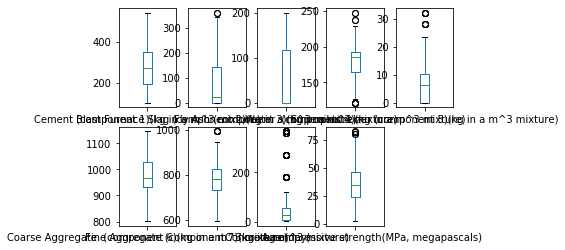

In [43]:
data.plot(kind='box',subplots=True,layout=(2,5))

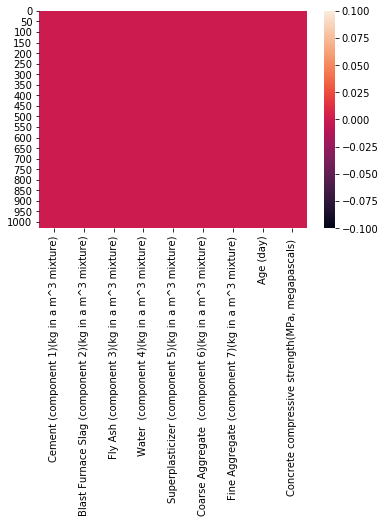

In [44]:
sb.heatmap(data.isnull())

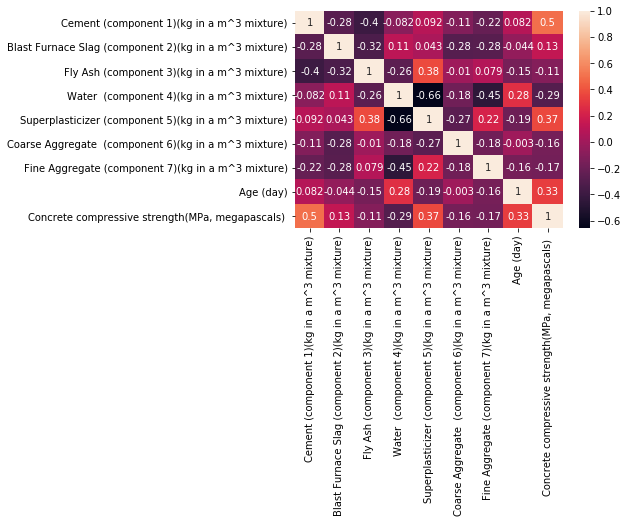

In [45]:
sb.heatmap(data.corr(),annot=True)

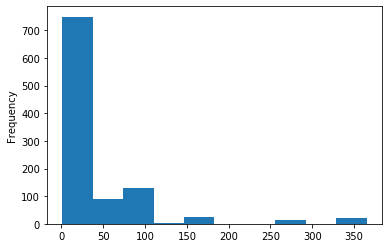

In [46]:
data['Age (day)'].plot.hist()

In [47]:
import numpy as np
data['Age (day)']=np.log(data['Age (day)'])

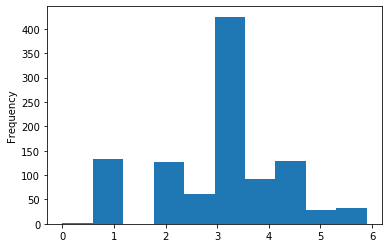

In [48]:
data['Age (day)'].plot.hist()

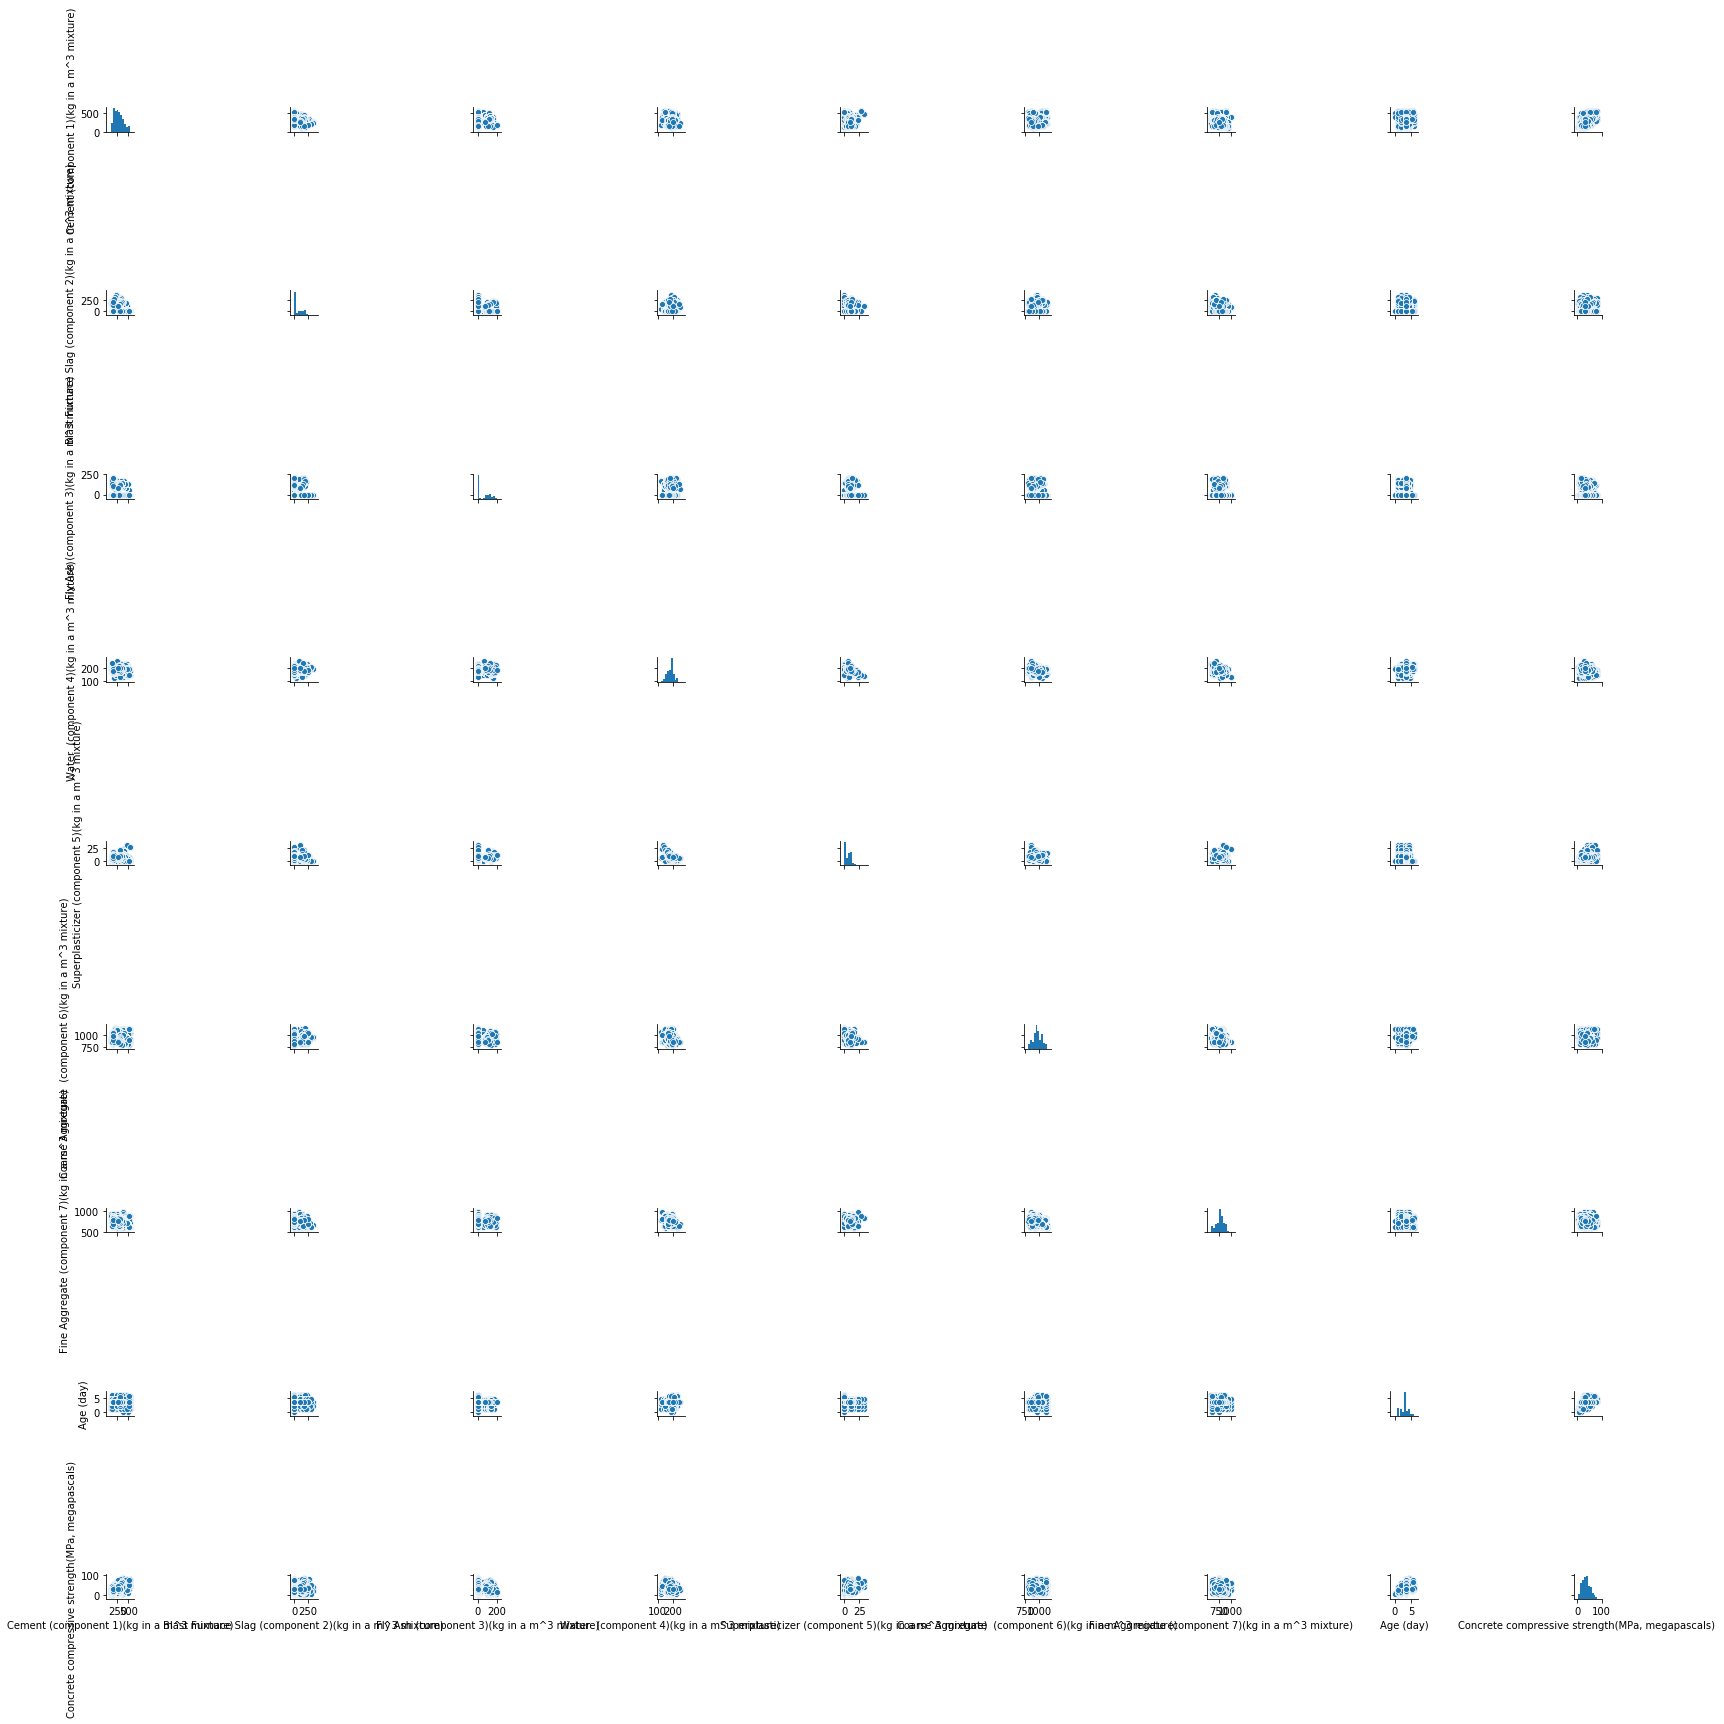

In [49]:
sb.pairplot(data)

In [54]:
from sklearn.preprocessing import Imputer

ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [52]:
imp=Imputer (missing_values=0,strategy='mean',axis=0)
imp=imp.fit(data)
dst=imp.transform(data.values)


dst

NameError: name 'Imputer' is not defined

In [50]:
dst=pd.DataFrame(dst)
dst

NameError: name 'dst' is not defined

In [52]:
y=dst.iloc[:,-1]

NameError: name 'dst' is not defined

In [53]:
y.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
y.shape

In [ ]:
x=dst.iloc[:,0:8]

In [ ]:
x

## Practice machine learning

In [79]:
#Basic Libreary
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Data Visulaization Libreary
import seaborn as sns
import matplotlib.pyplot as plt

#CheckSkewness And Outliers
from scipy.stats import zscore, boxcox

#Data Pre-Processing Libreary
from sklearn.preprocessing import LabelEncoder,StandardScaler,LabelBinarizer,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

#Model validation
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report,roc_auc_score,roc_curve,auc

#ML Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier,BaggingClassifier

#model svae
import joblib
from joblib import dump

In [80]:
LR=LogisticRegression()
GNB=GaussianNB()
KNC=KNeighborsClassifier()
SVC=SVC()
DTC=DecisionTreeClassifier()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
ETC=ExtraTreesClassifier()
BC=BaggingClassifier()

In [81]:
models=[]
models.append(('LogisticRegression',LR))
models.append(('GauusianNB',GNB))
models.append(('KNeighbors',KNC))
models.append(('SVC',SVC))
models.append(('DecisionTreeClassifier',DTC))
models.append(('RandomForestClassifier',RFC))
models.append(('GradientBoostingClassifier',GBC))
models.append(('AdaBoostClassifier',ABC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('BaggingClassifier',BC))

****** LogisticRegression ******


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_Score= 0.9523809523809523


Cross_Val_Score= 0.9455364073901569


roc_auc-score= 0.941440179321939


Classification_report
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.98      0.96        83

    accuracy                           0.95       126
   macro avg       0.95      0.94      0.95       126
weighted avg       0.95      0.95      0.95       126



[[39  4]
 [ 2 81]]





****** GauusianNB ******


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy_Score= 0.9444444444444444


Cross_Val_Score= 0.9385188635305075


ro

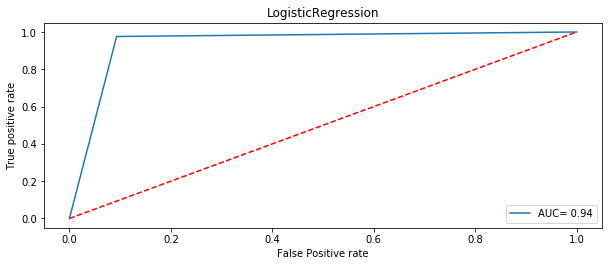

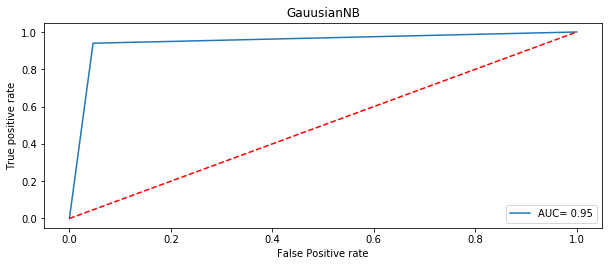

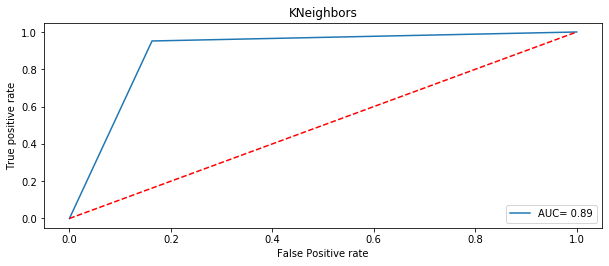

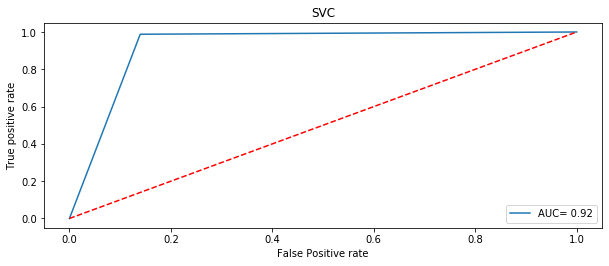

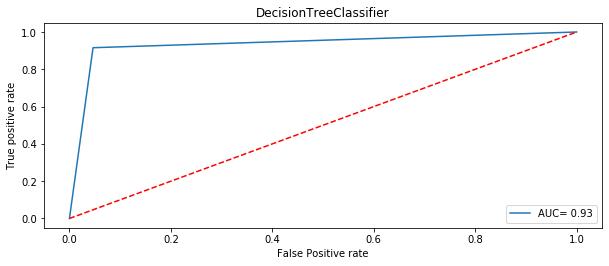

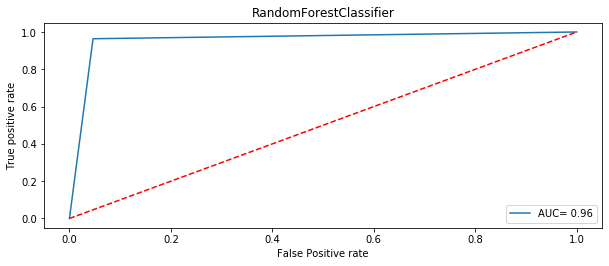

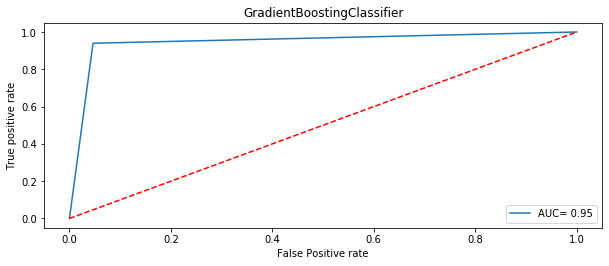

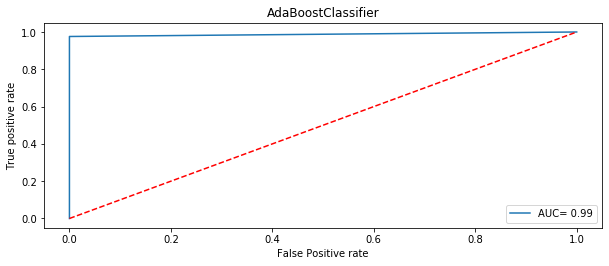

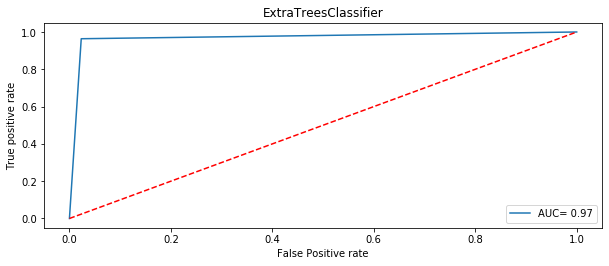

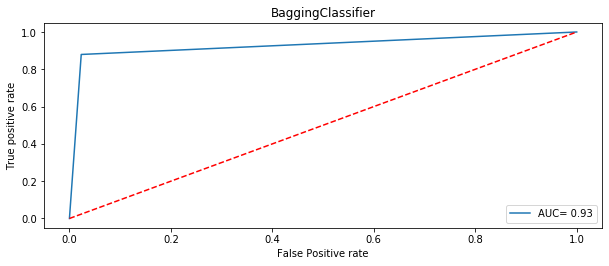

In [50]:
Model=[]
Score=[]
CVS=[]
ROC_Score=[]

for name,model in models:
    print('******',name,'******')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    
    #Accuracy Score
    AS=accuracy_score(y_test,pred)
    print('Accuracy_Score=',AS)
    Score.append(AS*100)
    print('\n')
    
    #Cross Val Score
    cross_val=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('Cross_Val_Score=',cross_val)
    CVS.append(cross_val*100)
    print('\n')
    
    #roc_auc_score
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc-score=',roc_auc)
    ROC_Score.append(roc_auc*100)
    print('\n')
    
    print('Classification_report\n',classification_report(y_test,pred))
    print('\n')
    
    #Confusion matrix
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC= %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False Positive rate')
    print('\n\n')

In [51]:
result=pd.DataFrame({'Model':Model,'Accuracy Score':Score,'Cross_Val_Score':CVS,'Cross_val-score':ROC_Score})
result

,Model,Accuracy Score,Cross_Val_Score,Cross_val-score
0,LogisticRegression,95.238095,94.553641,94.144018
1,GauusianNB,94.444444,93.851886,94.662370
2,KNeighbors,91.269841,92.794597,89.450827
3,SVC,94.444444,91.217202,92.420846
4,DecisionTreeClassifier,92.857143,92.263624,93.457551
5,RandomForestClassifier,96.031746,96.135693,95.867190
6,GradientBoostingClassifier,94.444444,96.312684,94.662370
7,AdaBoostClassifier,98.412698,97.186772,98.795181
8,ExtraTreesClassifier,96.825397,95.958702,97.029980
9,BaggingClassifier,91.269841,95.435491,92.813113


******** LogisticRegression ********


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score= 0.9523809523809523


Cross_Val_Score= 0.9455364073901569


ROC_Score= 0.941440179321939


classification_report
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.98      0.96        83

    accuracy                           0.95       126
   macro avg       0.95      0.94      0.95       126
weighted avg       0.95      0.95      0.95       126



[[39  4]
 [ 2 81]]





******** GauusianNB ********


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy Score= 0.9444444444444444


Cross_Val_Score= 0.9385188635305075


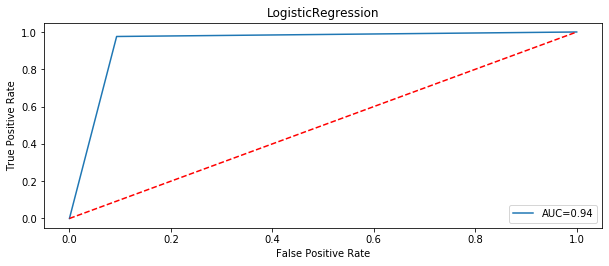

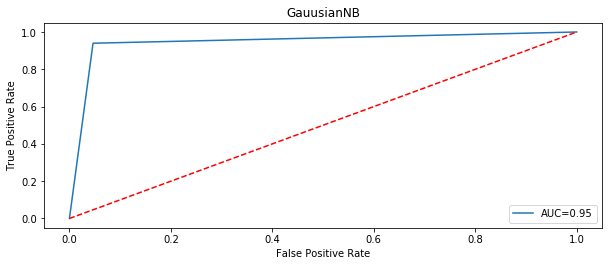

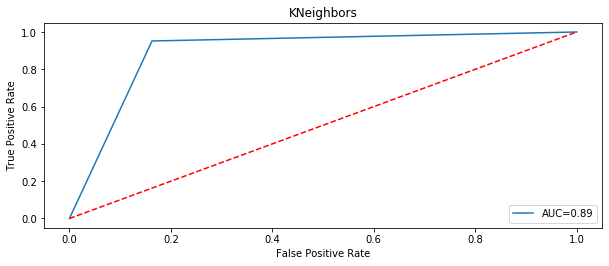

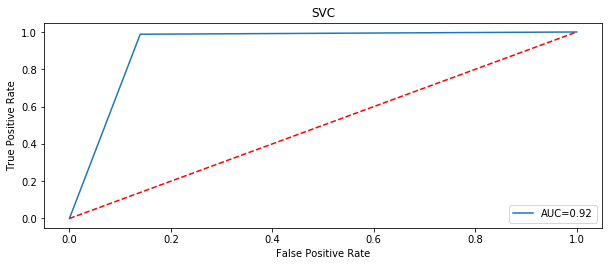

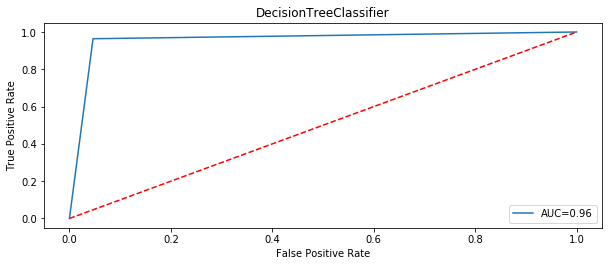

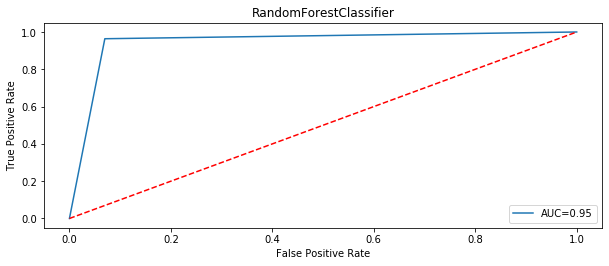

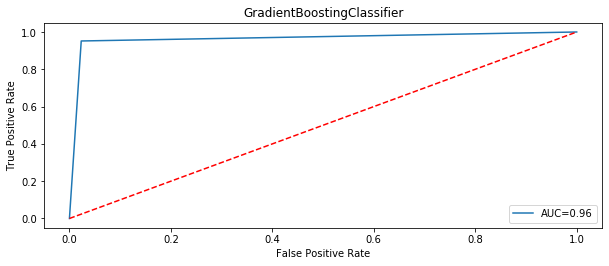

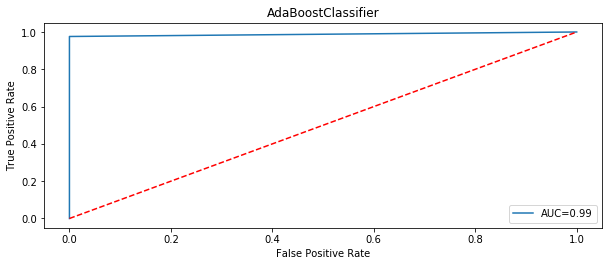

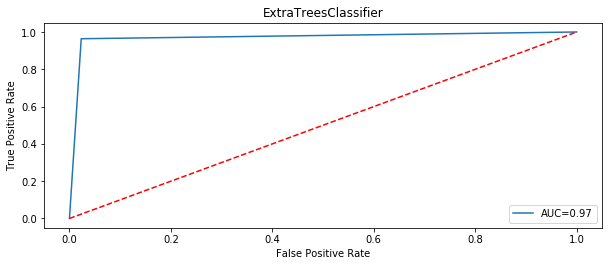

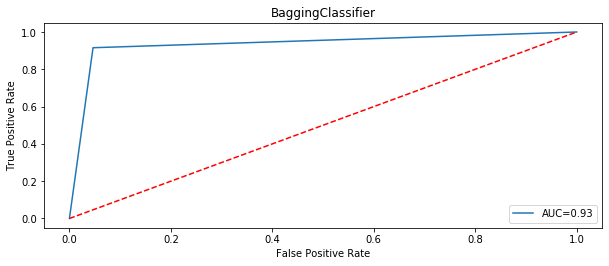

In [85]:
Model=[]
Score=[]
CVS=[]
rocscore=[]

for name,model in models:
    print('********',name,'********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    
    #Accuracy Score
    AS=accuracy_score(y_test,pred)
    print('Accuracy Score=',AS)
    Score.append(AS*100)
    print('\n')
    
    #Cross val Score
    cross_val=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('Cross_Val_Score=',cross_val)
    CVS.append(cross_val*100)
    print('\n')
    
    #ROC_Score
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('ROC_Score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    print('classification_report\n',classification_report(y_test,pred))
    print('\n')
    
    #Confusion Matrix
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [86]:
result=pd.DataFrame({'Model':Model,'Accuracy Score':Score,'Cross_Val_Score':CVS,'ROC_Score':rocscore})
result

,Model,Accuracy Score,Cross_Val_Score,ROC_Score
0,LogisticRegression,95.238095,94.553641,94.144018
1,GauusianNB,94.444444,93.851886,94.662370
2,KNeighbors,91.269841,92.794597,89.450827
3,SVC,94.444444,91.217202,92.420846
4,DecisionTreeClassifier,96.031746,91.034001,95.867190
5,RandomForestClassifier,95.238095,95.961807,94.704399
6,GradientBoostingClassifier,96.031746,96.312684,96.427571
7,AdaBoostClassifier,98.412698,97.186772,98.795181
8,ExtraTreesClassifier,96.825397,96.309579,97.029980
9,BaggingClassifier,92.857143,95.258500,93.457551
